### Titanic: Machine Learning from Disaster

Titanic 生存預測練習。

### 1. 載入必要的庫

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 2. 載入數據

In [16]:
train_df = pd.read_csv('../data/raw/train.csv')
test_df = pd.read_csv('../data/raw/test.csv')

print(f"訓練集大小: {train_df.shape}")
print(f"測試集大小: {test_df.shape}")

訓練集大小: (891, 12)
測試集大小: (418, 11)


### 3. 預覽數據

In [17]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 檢查資料概況與缺失值

In [18]:
print("--- 訓練集資訊 ---")
print(train_df.info())
print("\n--- 缺失值統計 ---")
print(train_df.isnull().sum())

--- 訓練集資訊 ---
<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB
None

--- 缺失值統計 ---
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked        

### 資料清洗與特徵工程

In [19]:
# 1. 填補 Age (用中位數)
train_df['Age'] = train_df['Age'].fillna(train_df['Age'].median())

# 2. 填補 Embarked (用出現最多次的港口)
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

# 3. 轉換性別為數值 (male: 0, female: 1)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# 4. 轉換登船港口為數值 (One-Hot Encoding)
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Emb')

# 5. 丟棄目前暫時用不到的複雜資訊 (如姓名、船票編號、客艙編號)
train_df_cleaned = train_df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)

print("預處理完成，目前的資料前五筆：")
display(train_df_cleaned.head())
print("\n目前缺失值狀況：")
print(train_df_cleaned.isnull().sum())

預處理完成，目前的資料前五筆：


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Emb_C,Emb_Q,Emb_S
0,0,3,0,22.0,1,0,7.2500,False,False,True
1,1,1,1,38.0,1,0,71.2833,True,False,False
2,1,3,1,26.0,0,0,7.9250,False,False,True
3,1,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,0,35.0,0,0,8.0500,False,False,True



目前缺失值狀況：
Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Emb_C       0
Emb_Q       0
Emb_S       0
dtype: int64


### Model Training

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# 1. 準備特徵 (X) 與目標 (y)
X = train_df_cleaned.drop('Survived', axis=1)
y = train_df_cleaned['Survived']

# 2. 切分資料集 (80% 訓練, 20% 驗證)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=11)

# 3. 建立並訓練隨機森林模型
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=11)
model.fit(X_train, y_train)

# 4. 在驗證集上做預測
y_pred = model.predict(X_val)

# 5. 查看結果
accuracy = accuracy_score(y_val, y_pred)
print(f"模型的準確度 (Accuracy): {accuracy:.2%}")
print("\n詳細分類報告：")
print(classification_report(y_val, y_pred))

# 6. 查看哪些特徵最重要
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\n特徵重要性排名：")
print(feature_importances)

模型的準確度 (Accuracy): 86.59%

詳細分類報告：
              precision    recall  f1-score   support

           0       0.85      0.97      0.90       118
           1       0.91      0.67      0.77        61

    accuracy                           0.87       179
   macro avg       0.88      0.82      0.84       179
weighted avg       0.87      0.87      0.86       179


特徵重要性排名：
Sex       0.427057
Fare      0.188302
Pclass    0.150504
Age       0.113036
SibSp     0.047822
Parch     0.025577
Emb_S     0.018787
Emb_Q     0.015327
Emb_C     0.013586
dtype: float64


準確率 (Accuracy): 0.8659
F1-score: 0.7736
ROC-AUC: 0.8961


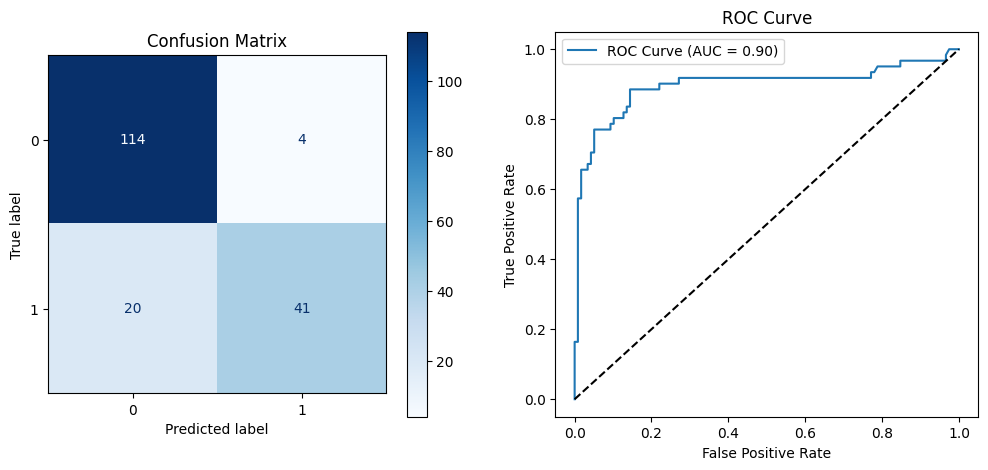

In [24]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay

# 1. 計算 F1-score (綜合考慮精確率與召回率)
f1 = f1_score(y_val, y_pred)

# 2. 計算 ROC-AUC (衡量模型區分生存/死亡的分類能力)
# 我們需要預測「機率」而不是直接預測 0 或 1
y_probs = model.predict_proba(X_val)[:, 1]
roc_auc = roc_auc_score(y_val, y_probs)

print(f"準確率 (Accuracy): {accuracy:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

# 3. 視覺化：混淆矩陣 (Confusion Matrix)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ConfusionMatrixDisplay.from_estimator(model, X_val, y_val, ax=ax[0], cmap='Blues')
ax[0].set_title('Confusion Matrix')

# 4. 視覺化：ROC 曲線
fpr, tpr, _ = roc_curve(y_val, y_probs)
ax[1].plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
ax[1].plot([0, 1], [0, 1], 'k--') # 點線代表隨機猜測
ax[1].set_xlabel('False Positive Rate')
ax[1].set_ylabel('True Positive Rate')
ax[1].set_title('ROC Curve')
ax[1].legend()

plt.show()